<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Raisin Category-TechGIG Machine Learning Challenge</h1>
</div>


#### Author:- Aniket B. Barphe
#### LinkedIn Profile:- https://www.linkedin.com/in/aniiketbarphe/
#### Platform:- TechGIG
#### Problem Statement:- Predict Raisin Category using Machine Learning

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import os

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Machine learning
from sklearn.linear_model import LogisticRegression
import catboost as cb
from catboost import CatBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import VotingClassifier


# Model Evaluations
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))
print('seaborn version {}'.format(sns.__version__))
print('sklearn version {}'.format(sk.__version__))
print('xgboost version {}'.format(xgb.__version__))
print('lightgbm version {}'.format(lgb.__version__))


CatBoost version 1.0.6
NumPy version 1.19.2
Pandas version 1.1.3
seaborn version 0.11.0
sklearn version 0.23.2
xgboost version 1.6.1
lightgbm version 3.3.2


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable 
- Read & Load "Submission" data in "submission" Variable 

In [2]:
train = pd.read_csv(r'C:\Users\PC\Pictures\TechGig\Training_DataSet_Raisin - Sheet1.csv')
test = pd.read_csv(r'C:\Users\PC\Pictures\TechGig\Testing_DataSet_Raisin - Sheet1.csv')
submission = pd.read_csv(r'C:\Users\PC\Pictures\TechGig\Sample_Submission_Raisin - Sheet1.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 


In [3]:

print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print('-------------'*9)

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print('-------------'*9)

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print('-------------'*9)

Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Key              495 non-null    int64  
 1   Area             495 non-null    int64  
 2   MajorAxisLength  495 non-null    float64
 3   MinorAxisLength  495 non-null    float64
 4   Eccentricity     495 non-null    float64
 5   ConvexArea       495 non-null    int64  
 6   Extent           495 non-null    float64
 7   Perimeter        495 non-null    float64
 8   Class            495 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 34.9+ KB
None 

Shape of Train Data:-

(495, 9) 

--------------------------------------------------------------------------------------------------------------

Data Types in Test Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 8 columns):
 #   Column    

In [4]:
print("About Train Data:-\n")
print(train.head(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')

About Train Data:-

   Key   Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    1  87524       442.246011       253.291155      0.819738       90546   
1    2  75166       406.690687       243.032436      0.801805       78789   
2    3  90856       442.267048       266.328318      0.798354       93717   
3    4  45928       286.540559       208.760042      0.684989       47336   
4    5  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter Class  
0  0.758651   1184.040  Keci  
1  0.684130   1121.786  Keci  
2  0.637613   1208.575  Keci  
3  0.699599    844.162  Keci  
4  0.792772   1073.251  Keci   

--------------------------------------------------------------------------------------------------------------

About Test Data:-

   Key   Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    1  39509       286.231563       180.437360      0.776279       41446   
1    2  66568       342.250361       249.550

In [5]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print('-------------'*9)

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print('-------------'*9)

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')

About Train Data:-

     Key   Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
490  491  83248       430.077308       247.838694      0.817263       85839   
491  492  87350       440.735698       259.293149      0.808629       90899   
492  493  99657       431.706981       298.837323      0.721684      106264   
493  494  93523       476.344094       254.176054      0.845739       97653   
494  495  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter Class  
490  0.668793   1129.072   Bes  
491  0.636476   1214.252   Bes  
492  0.741099   1292.828   Bes  
493  0.658798   1258.548   Bes  
494  0.632020   1272.862   Bes   

--------------------------------------------------------------------------------------------------------------

About Test Data:-

     Key    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
400  401   91464       433.219793       273.255461      0.775982       93852   
401  402   934

In [6]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,Key,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248
mean,248.000000,89959.484848,437.101770,256.934518,0.782964,93435.250505,0.697249,1181.181188,NaN
std,143.038456,40504.549589,120.531446,52.390935,0.091501,42556.798405,0.056343,284.524262,NaN
min,1.000000,25387.000000,225.629541,143.710872,0.369212,26139.000000,0.379856,619.074000,NaN
25%,124.500000,60324.000000,348.479463,219.337744,0.740466,62438.000000,0.668894,979.288500,NaN
50%,248.000000,79735.000000,411.207053,249.403725,0.800648,82949.000000,0.704686,1130.673000,NaN
75%,371.500000,108237.500000,507.262148,290.376181,0.846614,111957.500000,0.734178,1332.000000,NaN


In [7]:
test.describe(include='all')
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,Key,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,203.000000,85169.802469,423.386616,251.498107,0.779804,88437.116049,0.702269,1147.237738
std,117.057678,36962.363146,109.968739,46.776880,0.088933,38345.121389,0.049660,259.136594
min,1.000000,33662.000000,227.293792,161.702366,0.348730,34787.000000,0.496937,699.415000
25%,102.000000,58734.000000,342.250361,218.715777,0.742436,60490.000000,0.673138,945.523000
50%,203.000000,77043.000000,403.909415,245.440809,0.795245,80355.000000,0.709104,1103.153000
75%,304.000000,102944.000000,485.452143,275.287073,0.840174,106499.000000,0.735824,1285.063000
max,405.000000,222915.000000,820.724022,413.927473,0.928094,227170.000000,0.817389,2289.889000


In [8]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train)),columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




,Missing Values,Percentage Missing Values
Key,0,0.0
Area,0,0.0
MajorAxisLength,0,0.0
MinorAxisLength,0,0.0
Eccentricity,0,0.0
ConvexArea,0,0.0
Extent,0,0.0
Perimeter,0,0.0
Class,0,0.0


In [9]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test)),columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
Key,0,0.0
Area,0,0.0
MajorAxisLength,0,0.0
MinorAxisLength,0,0.0
Eccentricity,0,0.0
ConvexArea,0,0.0
Extent,0,0.0
Perimeter,0,0.0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Preprocessing of Train DataSet</h2>
</div>

- Handling "Class" Variable

#### * Handling of "Class" Variable

In [10]:
print('-------------'*9)
print("****************Variable = Class************In TRAIN Data************************************************************")

#train['Class'].value_counts()

train['Class']=train['Class'].map({'Bes':0, 'Keci':1})

#print(train['Class'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Class************In TRAIN Data************************************************************


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


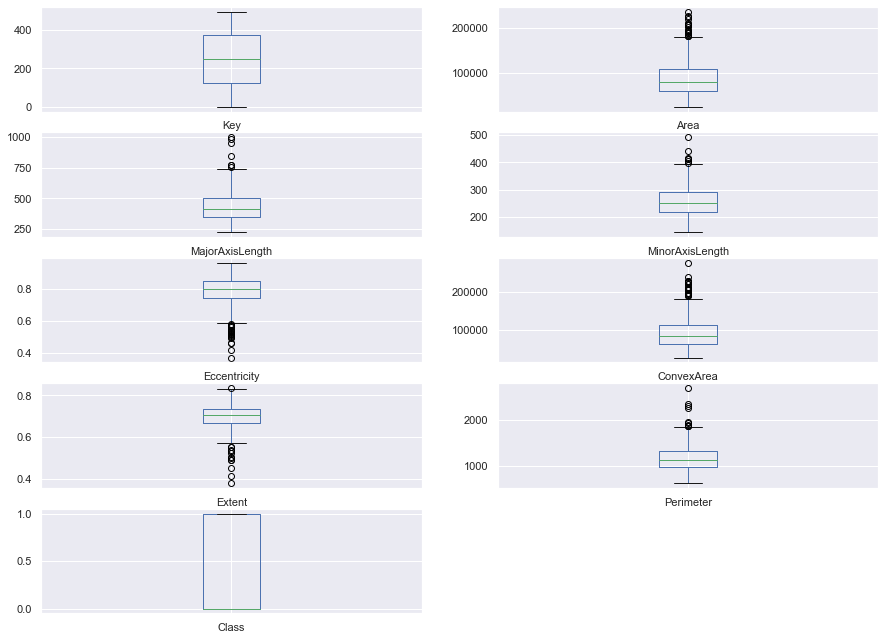

In [12]:
train.plot(kind="box",subplots=True,layout=(11,2),figsize=(15,25));

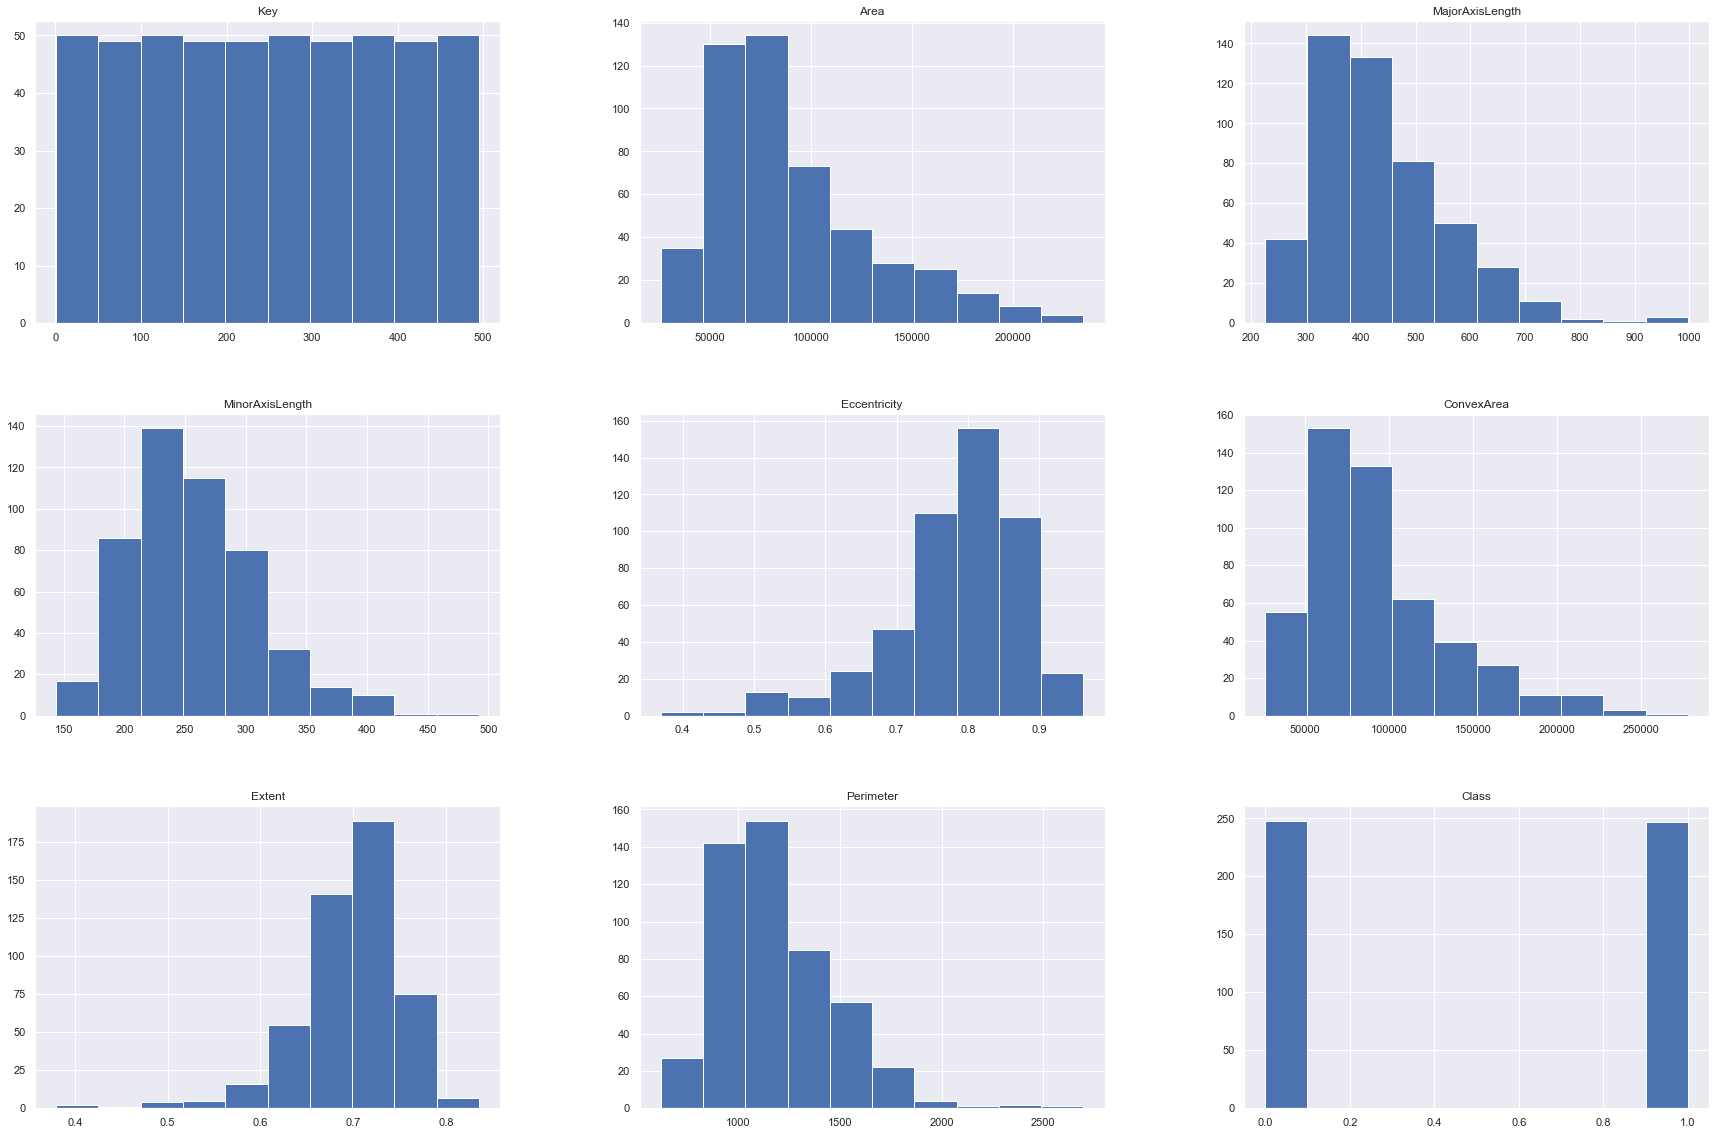

In [13]:
# Histogram to check for Data Distribution
train.hist(figsize=(30,20));

<AxesSubplot:>

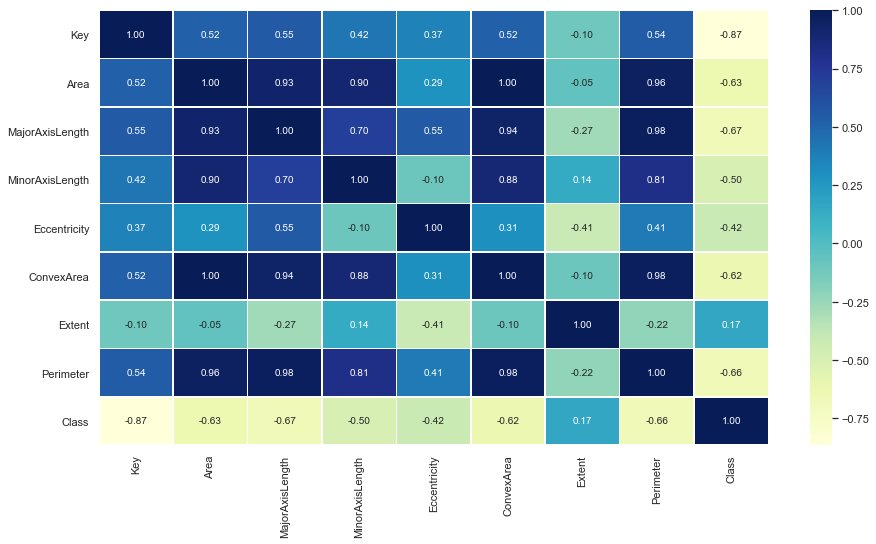

In [14]:
# Check the correlation
fig , ax = plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),annot = True,fmt='.2f',cmap='YlGnBu',linewidth=0.5)

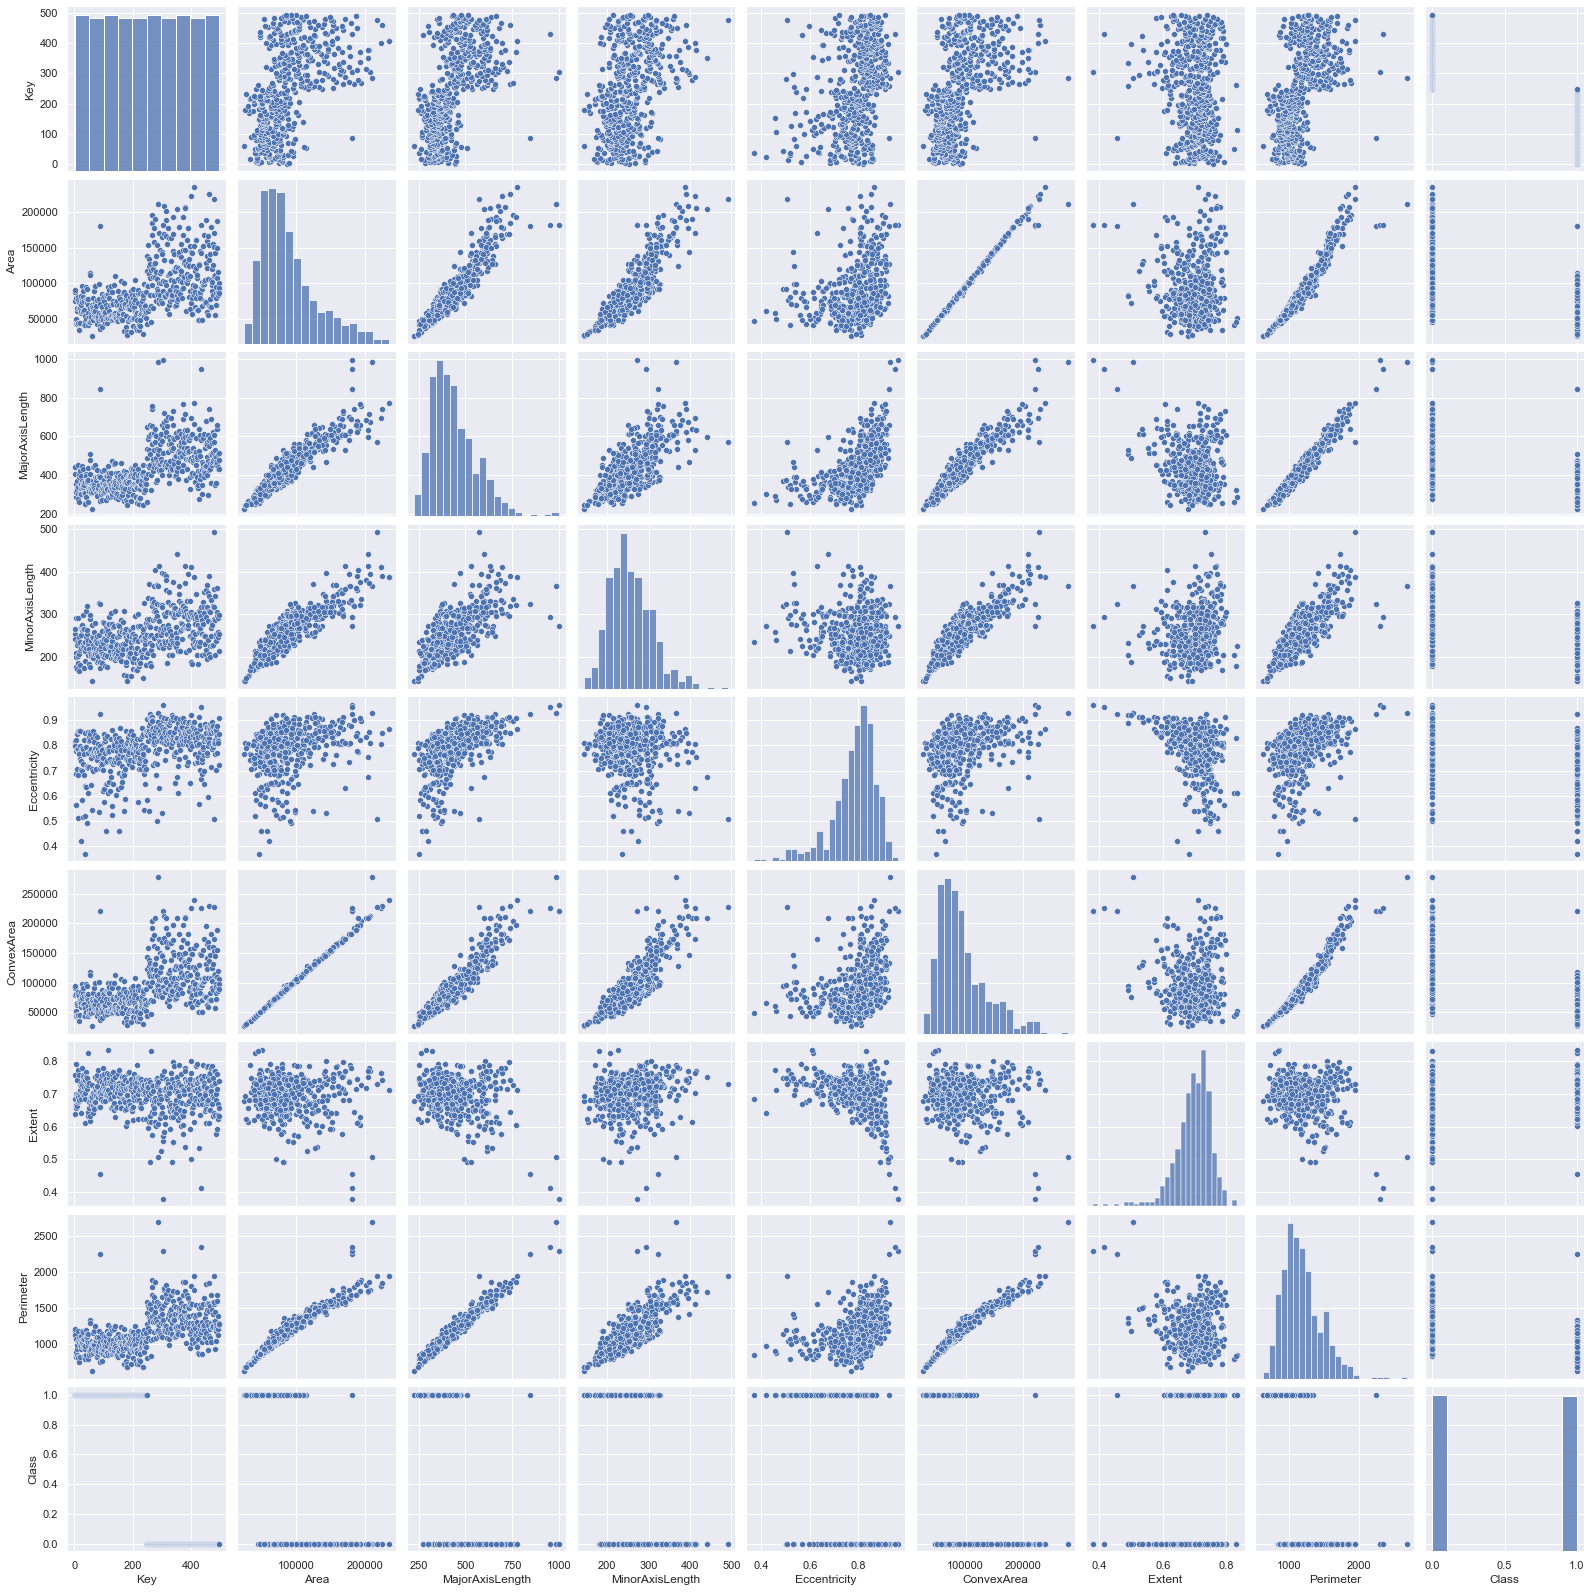

In [18]:
# Pair Plots to know the relation between different features
ax = sns.pairplot(train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [19]:
train.isnull().sum()

Key                0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [20]:
test.isnull().sum()

Key                0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Check Datatypes in Train and Test DataSet</h2>
</div>


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Key              495 non-null    int64  
 1   Area             495 non-null    int64  
 2   MajorAxisLength  495 non-null    float64
 3   MinorAxisLength  495 non-null    float64
 4   Eccentricity     495 non-null    float64
 5   ConvexArea       495 non-null    int64  
 6   Extent           495 non-null    float64
 7   Perimeter        495 non-null    float64
 8   Class            495 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 34.9 KB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Key              405 non-null    int64  
 1   Area             405 non-null    int64  
 2   MajorAxisLength  405 non-null    float64
 3   MinorAxisLength  405 non-null    float64
 4   Eccentricity     405 non-null    float64
 5   ConvexArea       405 non-null    int64  
 6   Extent           405 non-null    float64
 7   Perimeter        405 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 25.4 KB


In [23]:
print("Shape of Final Processed Train Data is:-\n",train.shape,'\n')
print('-------------'*9)

print("Shape of Final Processed Test Data is:-\n",test.shape,'\n')

print('-------------'*9)

print("\nColumns in the Final Processed Train Data\n",train.columns,'\n')

print("\nColumns in the Final Processed Train Data\n",test.columns,'\n')

print('-------------'*9)

Shape of Final Processed Train Data is:-
 (495, 9) 

---------------------------------------------------------------------------------------------------------------------
Shape of Final Processed Test Data is:-
 (405, 8) 

---------------------------------------------------------------------------------------------------------------------

Columns in the Final Processed Train Data
 Index(['Key', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object') 


Columns in the Final Processed Train Data
 Index(['Key', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter'],
      dtype='object') 

---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for Model Building</h2>
</div>


In [24]:
train_temp,test_temp=train_test_split(train,test_size=0.005,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp),"\nLength of Test Data:-",len(test_temp))

features=list(train.columns)
label='Class'

features.remove(label)

print('-------------'*9)
print("\nFEATURES ARE:-",features)

print('-------------'*9)
print("\nLABELS ARE:-",label)

print('-------------'*9)

# To check the data points in "Train" & "Test" datasets after split
X_train=train_temp[features]
y_train=train_temp[label]

X_test=test_temp[features]
y_test=test_temp[label]

Length of Original Data:- 495 
Length of Train Data:- 492 
Length of Test Data:- 3
---------------------------------------------------------------------------------------------------------------------

FEATURES ARE:- ['Key', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
---------------------------------------------------------------------------------------------------------------------

LABELS ARE:- Class
---------------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 1- Logistic Regression</h2>
</div>

In [31]:
model1 = LogisticRegression(random_state = 0)

model1.fit(X_train,y_train) 
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(model1.score(X_train, y_train)))

print('Accuracy of Logistic Regression on test set: {:.2f}'
     .format(model1.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model1.predict(X_test)),'\n')

Accuracy of Logistic Regression on training set: 0.99
Accuracy of Logistic Regression on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 2- CatBoost Classifier</h2>
</div>

In [29]:
model2 = CatBoostClassifier(max_depth=8, n_estimators=3000)

model2.fit(X_train,y_train) 

print('Accuracy of CatBoost Classifier on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))

print('Accuracy of CatBoost Classifier on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))

print('-------------'*9)

print('CatBoost Classification Report of the training data:\n\n',classification_report(y_test,model2.predict(X_test)),'\n')

Learning rate set to 0.002779
0:	learn: 0.6870039	total: 24.5ms	remaining: 1m 13s
1:	learn: 0.6808730	total: 40.6ms	remaining: 1m
2:	learn: 0.6754300	total: 54.3ms	remaining: 54.2s
3:	learn: 0.6697809	total: 64ms	remaining: 48s
4:	learn: 0.6642692	total: 74.9ms	remaining: 44.9s
5:	learn: 0.6585766	total: 84.5ms	remaining: 42.1s
6:	learn: 0.6525615	total: 96ms	remaining: 41.1s
7:	learn: 0.6466769	total: 109ms	remaining: 40.8s
8:	learn: 0.6410923	total: 151ms	remaining: 50.1s
9:	learn: 0.6358232	total: 169ms	remaining: 50.4s
10:	learn: 0.6308155	total: 178ms	remaining: 48.4s
11:	learn: 0.6254361	total: 187ms	remaining: 46.6s
12:	learn: 0.6200725	total: 197ms	remaining: 45.2s
13:	learn: 0.6148246	total: 207ms	remaining: 44.2s
14:	learn: 0.6095487	total: 218ms	remaining: 43.3s
15:	learn: 0.6044039	total: 227ms	remaining: 42.3s
16:	learn: 0.5996369	total: 236ms	remaining: 41.4s
17:	learn: 0.5946201	total: 245ms	remaining: 40.5s
18:	learn: 0.5891484	total: 257ms	remaining: 40.3s
19:	learn: 0

169:	learn: 0.1826498	total: 2.12s	remaining: 35.3s
170:	learn: 0.1814232	total: 2.13s	remaining: 35.3s
171:	learn: 0.1801994	total: 2.14s	remaining: 35.2s
172:	learn: 0.1791512	total: 2.15s	remaining: 35.2s
173:	learn: 0.1779330	total: 2.16s	remaining: 35.1s
174:	learn: 0.1768590	total: 2.17s	remaining: 35.1s
175:	learn: 0.1756443	total: 2.18s	remaining: 35s
176:	learn: 0.1742666	total: 2.2s	remaining: 35s
177:	learn: 0.1727892	total: 2.21s	remaining: 35s
178:	learn: 0.1713647	total: 2.22s	remaining: 35s
179:	learn: 0.1701889	total: 2.23s	remaining: 34.9s
180:	learn: 0.1691835	total: 2.24s	remaining: 34.9s
181:	learn: 0.1679743	total: 2.25s	remaining: 34.9s
182:	learn: 0.1668833	total: 2.26s	remaining: 34.8s
183:	learn: 0.1656825	total: 2.28s	remaining: 34.9s
184:	learn: 0.1645227	total: 2.29s	remaining: 34.8s
185:	learn: 0.1632778	total: 2.31s	remaining: 34.9s
186:	learn: 0.1622503	total: 2.32s	remaining: 34.9s
187:	learn: 0.1612077	total: 2.33s	remaining: 34.9s
188:	learn: 0.1601676

330:	learn: 0.0706600	total: 3.88s	remaining: 31.3s
331:	learn: 0.0703160	total: 3.9s	remaining: 31.3s
332:	learn: 0.0699525	total: 3.91s	remaining: 31.3s
333:	learn: 0.0696339	total: 3.92s	remaining: 31.3s
334:	learn: 0.0693215	total: 3.93s	remaining: 31.3s
335:	learn: 0.0690322	total: 3.94s	remaining: 31.2s
336:	learn: 0.0687052	total: 3.95s	remaining: 31.2s
337:	learn: 0.0684244	total: 3.96s	remaining: 31.2s
338:	learn: 0.0680850	total: 3.97s	remaining: 31.1s
339:	learn: 0.0676572	total: 3.98s	remaining: 31.1s
340:	learn: 0.0673456	total: 3.99s	remaining: 31.1s
341:	learn: 0.0669733	total: 4s	remaining: 31.1s
342:	learn: 0.0667094	total: 4.01s	remaining: 31s
343:	learn: 0.0663521	total: 4.01s	remaining: 31s
344:	learn: 0.0660256	total: 4.02s	remaining: 31s
345:	learn: 0.0656600	total: 4.03s	remaining: 30.9s
346:	learn: 0.0653845	total: 4.05s	remaining: 30.9s
347:	learn: 0.0650906	total: 4.06s	remaining: 30.9s
348:	learn: 0.0647337	total: 4.07s	remaining: 30.9s
349:	learn: 0.0644040	

499:	learn: 0.0340448	total: 5.83s	remaining: 29.1s
500:	learn: 0.0339360	total: 5.84s	remaining: 29.1s
501:	learn: 0.0338176	total: 5.86s	remaining: 29.2s
502:	learn: 0.0337155	total: 5.88s	remaining: 29.2s
503:	learn: 0.0335706	total: 5.9s	remaining: 29.2s
504:	learn: 0.0334459	total: 5.92s	remaining: 29.3s
505:	learn: 0.0332855	total: 5.95s	remaining: 29.3s
506:	learn: 0.0331836	total: 5.97s	remaining: 29.3s
507:	learn: 0.0330692	total: 5.99s	remaining: 29.4s
508:	learn: 0.0328946	total: 6.02s	remaining: 29.5s
509:	learn: 0.0328038	total: 6.04s	remaining: 29.5s
510:	learn: 0.0326696	total: 6.06s	remaining: 29.5s
511:	learn: 0.0325561	total: 6.09s	remaining: 29.6s
512:	learn: 0.0324493	total: 6.11s	remaining: 29.6s
513:	learn: 0.0323252	total: 6.14s	remaining: 29.7s
514:	learn: 0.0322070	total: 6.16s	remaining: 29.7s
515:	learn: 0.0321257	total: 6.17s	remaining: 29.7s
516:	learn: 0.0320091	total: 6.2s	remaining: 29.8s
517:	learn: 0.0318942	total: 6.21s	remaining: 29.8s
518:	learn: 0.

664:	learn: 0.0201822	total: 8.19s	remaining: 28.8s
665:	learn: 0.0201142	total: 8.21s	remaining: 28.8s
666:	learn: 0.0200769	total: 8.22s	remaining: 28.8s
667:	learn: 0.0200172	total: 8.23s	remaining: 28.7s
668:	learn: 0.0199498	total: 8.24s	remaining: 28.7s
669:	learn: 0.0199033	total: 8.25s	remaining: 28.7s
670:	learn: 0.0198414	total: 8.26s	remaining: 28.7s
671:	learn: 0.0197803	total: 8.27s	remaining: 28.7s
672:	learn: 0.0197411	total: 8.28s	remaining: 28.6s
673:	learn: 0.0196812	total: 8.29s	remaining: 28.6s
674:	learn: 0.0196188	total: 8.3s	remaining: 28.6s
675:	learn: 0.0195561	total: 8.31s	remaining: 28.6s
676:	learn: 0.0195008	total: 8.32s	remaining: 28.6s
677:	learn: 0.0194504	total: 8.34s	remaining: 28.6s
678:	learn: 0.0194098	total: 8.35s	remaining: 28.6s
679:	learn: 0.0193692	total: 8.37s	remaining: 28.6s
680:	learn: 0.0193186	total: 8.39s	remaining: 28.6s
681:	learn: 0.0192673	total: 8.41s	remaining: 28.6s
682:	learn: 0.0191885	total: 8.43s	remaining: 28.6s
683:	learn: 0

824:	learn: 0.0136119	total: 10.3s	remaining: 27.2s
825:	learn: 0.0135826	total: 10.3s	remaining: 27.2s
826:	learn: 0.0135596	total: 10.4s	remaining: 27.2s
827:	learn: 0.0135309	total: 10.4s	remaining: 27.2s
828:	learn: 0.0135022	total: 10.4s	remaining: 27.2s
829:	learn: 0.0134708	total: 10.4s	remaining: 27.2s
830:	learn: 0.0134369	total: 10.4s	remaining: 27.2s
831:	learn: 0.0134136	total: 10.4s	remaining: 27.2s
832:	learn: 0.0133861	total: 10.4s	remaining: 27.2s
833:	learn: 0.0133593	total: 10.5s	remaining: 27.1s
834:	learn: 0.0133253	total: 10.5s	remaining: 27.1s
835:	learn: 0.0132954	total: 10.5s	remaining: 27.1s
836:	learn: 0.0132642	total: 10.5s	remaining: 27.1s
837:	learn: 0.0132395	total: 10.5s	remaining: 27.1s
838:	learn: 0.0131980	total: 10.5s	remaining: 27.1s
839:	learn: 0.0131705	total: 10.5s	remaining: 27.1s
840:	learn: 0.0131432	total: 10.5s	remaining: 27s
841:	learn: 0.0131126	total: 10.5s	remaining: 27s
842:	learn: 0.0130896	total: 10.6s	remaining: 27s
843:	learn: 0.0130

996:	learn: 0.0098165	total: 12.3s	remaining: 24.7s
997:	learn: 0.0098023	total: 12.3s	remaining: 24.7s
998:	learn: 0.0097811	total: 12.3s	remaining: 24.7s
999:	learn: 0.0097661	total: 12.3s	remaining: 24.7s
1000:	learn: 0.0097536	total: 12.4s	remaining: 24.7s
1001:	learn: 0.0097322	total: 12.4s	remaining: 24.7s
1002:	learn: 0.0097153	total: 12.4s	remaining: 24.6s
1003:	learn: 0.0096974	total: 12.4s	remaining: 24.6s
1004:	learn: 0.0096789	total: 12.4s	remaining: 24.6s
1005:	learn: 0.0096669	total: 12.4s	remaining: 24.6s
1006:	learn: 0.0096485	total: 12.4s	remaining: 24.6s
1007:	learn: 0.0096335	total: 12.4s	remaining: 24.6s
1008:	learn: 0.0096150	total: 12.5s	remaining: 24.6s
1009:	learn: 0.0095915	total: 12.5s	remaining: 24.5s
1010:	learn: 0.0095732	total: 12.5s	remaining: 24.5s
1011:	learn: 0.0095577	total: 12.5s	remaining: 24.5s
1012:	learn: 0.0095423	total: 12.5s	remaining: 24.6s
1013:	learn: 0.0095165	total: 12.5s	remaining: 24.5s
1014:	learn: 0.0094973	total: 12.5s	remaining: 24.

1163:	learn: 0.0075385	total: 14.6s	remaining: 23s
1164:	learn: 0.0075295	total: 14.6s	remaining: 23s
1165:	learn: 0.0075170	total: 14.6s	remaining: 22.9s
1166:	learn: 0.0075067	total: 14.6s	remaining: 22.9s
1167:	learn: 0.0074963	total: 14.6s	remaining: 22.9s
1168:	learn: 0.0074858	total: 14.6s	remaining: 22.9s
1169:	learn: 0.0074726	total: 14.6s	remaining: 22.9s
1170:	learn: 0.0074630	total: 14.6s	remaining: 22.9s
1171:	learn: 0.0074558	total: 14.7s	remaining: 22.9s
1172:	learn: 0.0074493	total: 14.7s	remaining: 22.8s
1173:	learn: 0.0074349	total: 14.7s	remaining: 22.8s
1174:	learn: 0.0074244	total: 14.7s	remaining: 22.8s
1175:	learn: 0.0074171	total: 14.7s	remaining: 22.8s
1176:	learn: 0.0074063	total: 14.7s	remaining: 22.8s
1177:	learn: 0.0073966	total: 14.7s	remaining: 22.8s
1178:	learn: 0.0073801	total: 14.7s	remaining: 22.8s
1179:	learn: 0.0073676	total: 14.7s	remaining: 22.7s
1180:	learn: 0.0073562	total: 14.8s	remaining: 22.7s
1181:	learn: 0.0073478	total: 14.8s	remaining: 22.

1324:	learn: 0.0060910	total: 16.5s	remaining: 20.9s
1325:	learn: 0.0060827	total: 16.5s	remaining: 20.8s
1326:	learn: 0.0060745	total: 16.5s	remaining: 20.8s
1327:	learn: 0.0060672	total: 16.5s	remaining: 20.8s
1328:	learn: 0.0060614	total: 16.6s	remaining: 20.8s
1329:	learn: 0.0060553	total: 16.6s	remaining: 20.8s
1330:	learn: 0.0060492	total: 16.6s	remaining: 20.8s
1331:	learn: 0.0060376	total: 16.6s	remaining: 20.8s
1332:	learn: 0.0060307	total: 16.6s	remaining: 20.8s
1333:	learn: 0.0060252	total: 16.6s	remaining: 20.7s
1334:	learn: 0.0060151	total: 16.6s	remaining: 20.7s
1335:	learn: 0.0060095	total: 16.6s	remaining: 20.7s
1336:	learn: 0.0060036	total: 16.6s	remaining: 20.7s
1337:	learn: 0.0059964	total: 16.7s	remaining: 20.7s
1338:	learn: 0.0059898	total: 16.7s	remaining: 20.7s
1339:	learn: 0.0059839	total: 16.7s	remaining: 20.7s
1340:	learn: 0.0059777	total: 16.7s	remaining: 20.7s
1341:	learn: 0.0059699	total: 16.7s	remaining: 20.6s
1342:	learn: 0.0059601	total: 16.7s	remaining:

1490:	learn: 0.0050579	total: 19s	remaining: 19.3s
1491:	learn: 0.0050533	total: 19.1s	remaining: 19.3s
1492:	learn: 0.0050470	total: 19.1s	remaining: 19.3s
1493:	learn: 0.0050424	total: 19.1s	remaining: 19.3s
1494:	learn: 0.0050352	total: 19.1s	remaining: 19.2s
1495:	learn: 0.0050288	total: 19.2s	remaining: 19.3s
1496:	learn: 0.0050212	total: 19.2s	remaining: 19.2s
1497:	learn: 0.0050172	total: 19.2s	remaining: 19.2s
1498:	learn: 0.0050110	total: 19.2s	remaining: 19.2s
1499:	learn: 0.0050038	total: 19.2s	remaining: 19.2s
1500:	learn: 0.0049989	total: 19.2s	remaining: 19.2s
1501:	learn: 0.0049945	total: 19.3s	remaining: 19.2s
1502:	learn: 0.0049900	total: 19.3s	remaining: 19.2s
1503:	learn: 0.0049803	total: 19.3s	remaining: 19.2s
1504:	learn: 0.0049733	total: 19.3s	remaining: 19.2s
1505:	learn: 0.0049679	total: 19.3s	remaining: 19.2s
1506:	learn: 0.0049623	total: 19.3s	remaining: 19.2s
1507:	learn: 0.0049574	total: 19.4s	remaining: 19.2s
1508:	learn: 0.0049535	total: 19.4s	remaining: 1

1660:	learn: 0.0042835	total: 21.3s	remaining: 17.2s
1661:	learn: 0.0042812	total: 21.3s	remaining: 17.2s
1662:	learn: 0.0042773	total: 21.4s	remaining: 17.2s
1663:	learn: 0.0042729	total: 21.4s	remaining: 17.1s
1664:	learn: 0.0042704	total: 21.4s	remaining: 17.1s
1665:	learn: 0.0042662	total: 21.4s	remaining: 17.1s
1666:	learn: 0.0042630	total: 21.4s	remaining: 17.1s
1667:	learn: 0.0042604	total: 21.4s	remaining: 17.1s
1668:	learn: 0.0042572	total: 21.4s	remaining: 17.1s
1669:	learn: 0.0042520	total: 21.4s	remaining: 17.1s
1670:	learn: 0.0042489	total: 21.4s	remaining: 17s
1671:	learn: 0.0042447	total: 21.4s	remaining: 17s
1672:	learn: 0.0042415	total: 21.5s	remaining: 17s
1673:	learn: 0.0042379	total: 21.5s	remaining: 17s
1674:	learn: 0.0042331	total: 21.5s	remaining: 17s
1675:	learn: 0.0042281	total: 21.6s	remaining: 17s
1676:	learn: 0.0042244	total: 21.6s	remaining: 17s
1677:	learn: 0.0042207	total: 21.6s	remaining: 17s
1678:	learn: 0.0042164	total: 21.7s	remaining: 17s
1679:	learn

1823:	learn: 0.0037319	total: 24.1s	remaining: 15.6s
1824:	learn: 0.0037284	total: 24.1s	remaining: 15.5s
1825:	learn: 0.0037251	total: 24.2s	remaining: 15.5s
1826:	learn: 0.0037223	total: 24.2s	remaining: 15.5s
1827:	learn: 0.0037198	total: 24.2s	remaining: 15.5s
1828:	learn: 0.0037168	total: 24.2s	remaining: 15.5s
1829:	learn: 0.0037137	total: 24.2s	remaining: 15.5s
1830:	learn: 0.0037110	total: 24.2s	remaining: 15.5s
1831:	learn: 0.0037080	total: 24.2s	remaining: 15.4s
1832:	learn: 0.0037053	total: 24.2s	remaining: 15.4s
1833:	learn: 0.0037030	total: 24.2s	remaining: 15.4s
1834:	learn: 0.0036984	total: 24.2s	remaining: 15.4s
1835:	learn: 0.0036958	total: 24.3s	remaining: 15.4s
1836:	learn: 0.0036934	total: 24.3s	remaining: 15.4s
1837:	learn: 0.0036911	total: 24.3s	remaining: 15.3s
1838:	learn: 0.0036880	total: 24.3s	remaining: 15.3s
1839:	learn: 0.0036838	total: 24.3s	remaining: 15.3s
1840:	learn: 0.0036819	total: 24.3s	remaining: 15.3s
1841:	learn: 0.0036796	total: 24.4s	remaining:

1983:	learn: 0.0032945	total: 26.5s	remaining: 13.6s
1984:	learn: 0.0032918	total: 26.5s	remaining: 13.5s
1985:	learn: 0.0032901	total: 26.5s	remaining: 13.5s
1986:	learn: 0.0032872	total: 26.5s	remaining: 13.5s
1987:	learn: 0.0032850	total: 26.5s	remaining: 13.5s
1988:	learn: 0.0032835	total: 26.6s	remaining: 13.5s
1989:	learn: 0.0032818	total: 26.6s	remaining: 13.5s
1990:	learn: 0.0032794	total: 26.6s	remaining: 13.5s
1991:	learn: 0.0032776	total: 26.6s	remaining: 13.5s
1992:	learn: 0.0032742	total: 26.6s	remaining: 13.5s
1993:	learn: 0.0032717	total: 26.6s	remaining: 13.4s
1994:	learn: 0.0032690	total: 26.7s	remaining: 13.4s
1995:	learn: 0.0032663	total: 26.7s	remaining: 13.4s
1996:	learn: 0.0032646	total: 26.7s	remaining: 13.4s
1997:	learn: 0.0032620	total: 26.7s	remaining: 13.4s
1998:	learn: 0.0032597	total: 26.7s	remaining: 13.4s
1999:	learn: 0.0032573	total: 26.7s	remaining: 13.4s
2000:	learn: 0.0032555	total: 26.7s	remaining: 13.3s
2001:	learn: 0.0032534	total: 26.7s	remaining:

2152:	learn: 0.0029442	total: 28.8s	remaining: 11.3s
2153:	learn: 0.0029427	total: 28.8s	remaining: 11.3s
2154:	learn: 0.0029408	total: 28.8s	remaining: 11.3s
2155:	learn: 0.0029395	total: 28.9s	remaining: 11.3s
2156:	learn: 0.0029377	total: 28.9s	remaining: 11.3s
2157:	learn: 0.0029360	total: 28.9s	remaining: 11.3s
2158:	learn: 0.0029344	total: 28.9s	remaining: 11.3s
2159:	learn: 0.0029330	total: 28.9s	remaining: 11.2s
2160:	learn: 0.0029312	total: 28.9s	remaining: 11.2s
2161:	learn: 0.0029295	total: 28.9s	remaining: 11.2s
2162:	learn: 0.0029276	total: 28.9s	remaining: 11.2s
2163:	learn: 0.0029251	total: 28.9s	remaining: 11.2s
2164:	learn: 0.0029234	total: 28.9s	remaining: 11.2s
2165:	learn: 0.0029211	total: 29s	remaining: 11.1s
2166:	learn: 0.0029192	total: 29s	remaining: 11.1s
2167:	learn: 0.0029166	total: 29s	remaining: 11.1s
2168:	learn: 0.0029144	total: 29s	remaining: 11.1s
2169:	learn: 0.0029124	total: 29s	remaining: 11.1s
2170:	learn: 0.0029099	total: 29s	remaining: 11.1s
2171:

2311:	learn: 0.0026707	total: 31s	remaining: 9.21s
2312:	learn: 0.0026687	total: 31s	remaining: 9.2s
2313:	learn: 0.0026673	total: 31s	remaining: 9.19s
2314:	learn: 0.0026657	total: 31s	remaining: 9.17s
2315:	learn: 0.0026643	total: 31s	remaining: 9.16s
2316:	learn: 0.0026631	total: 31s	remaining: 9.14s
2317:	learn: 0.0026615	total: 31s	remaining: 9.13s
2318:	learn: 0.0026605	total: 31s	remaining: 9.11s
2319:	learn: 0.0026595	total: 31s	remaining: 9.1s
2320:	learn: 0.0026577	total: 31.1s	remaining: 9.09s
2321:	learn: 0.0026561	total: 31.1s	remaining: 9.07s
2322:	learn: 0.0026544	total: 31.1s	remaining: 9.06s
2323:	learn: 0.0026529	total: 31.1s	remaining: 9.04s
2324:	learn: 0.0026514	total: 31.1s	remaining: 9.03s
2325:	learn: 0.0026497	total: 31.1s	remaining: 9.01s
2326:	learn: 0.0026484	total: 31.1s	remaining: 9s
2327:	learn: 0.0026470	total: 31.1s	remaining: 8.98s
2328:	learn: 0.0026456	total: 31.1s	remaining: 8.97s
2329:	learn: 0.0026440	total: 31.1s	remaining: 8.96s
2330:	learn: 0.0

2471:	learn: 0.0024358	total: 32.8s	remaining: 7s
2472:	learn: 0.0024345	total: 32.8s	remaining: 6.98s
2473:	learn: 0.0024336	total: 32.8s	remaining: 6.97s
2474:	learn: 0.0024322	total: 32.8s	remaining: 6.96s
2475:	learn: 0.0024309	total: 32.8s	remaining: 6.95s
2476:	learn: 0.0024301	total: 32.9s	remaining: 6.94s
2477:	learn: 0.0024283	total: 32.9s	remaining: 6.93s
2478:	learn: 0.0024271	total: 32.9s	remaining: 6.91s
2479:	learn: 0.0024263	total: 32.9s	remaining: 6.9s
2480:	learn: 0.0024247	total: 32.9s	remaining: 6.88s
2481:	learn: 0.0024235	total: 32.9s	remaining: 6.87s
2482:	learn: 0.0024216	total: 32.9s	remaining: 6.86s
2483:	learn: 0.0024209	total: 33s	remaining: 6.84s
2484:	learn: 0.0024198	total: 33s	remaining: 6.83s
2485:	learn: 0.0024184	total: 33s	remaining: 6.82s
2486:	learn: 0.0024172	total: 33s	remaining: 6.8s
2487:	learn: 0.0024157	total: 33s	remaining: 6.79s
2488:	learn: 0.0024142	total: 33s	remaining: 6.78s
2489:	learn: 0.0024127	total: 33s	remaining: 6.77s
2490:	learn:

2640:	learn: 0.0022192	total: 34.9s	remaining: 4.75s
2641:	learn: 0.0022178	total: 34.9s	remaining: 4.73s
2642:	learn: 0.0022166	total: 35s	remaining: 4.72s
2643:	learn: 0.0022157	total: 35s	remaining: 4.71s
2644:	learn: 0.0022142	total: 35s	remaining: 4.7s
2645:	learn: 0.0022134	total: 35s	remaining: 4.68s
2646:	learn: 0.0022127	total: 35s	remaining: 4.67s
2647:	learn: 0.0022116	total: 35s	remaining: 4.66s
2648:	learn: 0.0022102	total: 35s	remaining: 4.64s
2649:	learn: 0.0022087	total: 35s	remaining: 4.63s
2650:	learn: 0.0022076	total: 35.1s	remaining: 4.62s
2651:	learn: 0.0022062	total: 35.1s	remaining: 4.6s
2652:	learn: 0.0022050	total: 35.1s	remaining: 4.59s
2653:	learn: 0.0022039	total: 35.1s	remaining: 4.57s
2654:	learn: 0.0022020	total: 35.1s	remaining: 4.56s
2655:	learn: 0.0022008	total: 35.1s	remaining: 4.55s
2656:	learn: 0.0021998	total: 35.1s	remaining: 4.53s
2657:	learn: 0.0021983	total: 35.1s	remaining: 4.52s
2658:	learn: 0.0021973	total: 35.1s	remaining: 4.5s
2659:	learn:

2811:	learn: 0.0020152	total: 36.7s	remaining: 2.45s
2812:	learn: 0.0020140	total: 36.7s	remaining: 2.44s
2813:	learn: 0.0020129	total: 36.7s	remaining: 2.43s
2814:	learn: 0.0020116	total: 36.7s	remaining: 2.41s
2815:	learn: 0.0020108	total: 36.7s	remaining: 2.4s
2816:	learn: 0.0020099	total: 36.7s	remaining: 2.39s
2817:	learn: 0.0020090	total: 36.7s	remaining: 2.37s
2818:	learn: 0.0020077	total: 36.8s	remaining: 2.36s
2819:	learn: 0.0020064	total: 36.8s	remaining: 2.35s
2820:	learn: 0.0020054	total: 36.8s	remaining: 2.33s
2821:	learn: 0.0020040	total: 36.8s	remaining: 2.32s
2822:	learn: 0.0020030	total: 36.8s	remaining: 2.31s
2823:	learn: 0.0020018	total: 36.8s	remaining: 2.29s
2824:	learn: 0.0020012	total: 36.8s	remaining: 2.28s
2825:	learn: 0.0019998	total: 36.8s	remaining: 2.27s
2826:	learn: 0.0019988	total: 36.8s	remaining: 2.25s
2827:	learn: 0.0019977	total: 36.9s	remaining: 2.24s
2828:	learn: 0.0019963	total: 36.9s	remaining: 2.23s
2829:	learn: 0.0019952	total: 36.9s	remaining: 

2972:	learn: 0.0018465	total: 38.8s	remaining: 352ms
2973:	learn: 0.0018456	total: 38.8s	remaining: 339ms
2974:	learn: 0.0018448	total: 38.8s	remaining: 326ms
2975:	learn: 0.0018439	total: 38.8s	remaining: 313ms
2976:	learn: 0.0018430	total: 38.8s	remaining: 300ms
2977:	learn: 0.0018420	total: 38.8s	remaining: 287ms
2978:	learn: 0.0018410	total: 38.8s	remaining: 274ms
2979:	learn: 0.0018397	total: 38.9s	remaining: 261ms
2980:	learn: 0.0018388	total: 38.9s	remaining: 248ms
2981:	learn: 0.0018378	total: 38.9s	remaining: 235ms
2982:	learn: 0.0018367	total: 38.9s	remaining: 222ms
2983:	learn: 0.0018359	total: 38.9s	remaining: 209ms
2984:	learn: 0.0018348	total: 38.9s	remaining: 195ms
2985:	learn: 0.0018338	total: 38.9s	remaining: 182ms
2986:	learn: 0.0018326	total: 38.9s	remaining: 169ms
2987:	learn: 0.0018316	total: 38.9s	remaining: 156ms
2988:	learn: 0.0018306	total: 38.9s	remaining: 143ms
2989:	learn: 0.0018297	total: 38.9s	remaining: 130ms
2990:	learn: 0.0018286	total: 39s	remaining: 1

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 3- XGB Classifier</h2>
</div>

In [28]:
model3 = XGBClassifier(random_state=42,max_depth = 5)

model3.fit(X_train,y_train) 

print('Accuracy of XGB Classifier on training set: {:.2f}'
     .format(model3.score(X_train, y_train)))

print('Accuracy of XGB Classifier test set: {:.2f}'
     .format(model3.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model3.predict(X_test)),'\n')

Accuracy of XGB Classifier on training set: 1.00
Accuracy of XGB Classifier test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model 4- Light Gradient Boosted Machine(LGBM) Classifier</h2>
</div>

In [27]:
model4 = LGBMClassifier(random_state = 42,max_depth=11, n_estimators=240)

model4.fit(X_train,y_train) 

print('Accuracy of LGBM Classifier on training set: {:.2f}'
     .format(model4.score(X_train, y_train)))

print('Accuracy of LGBM Classifier on test set: {:.2f}'
     .format(model4.score(X_test, y_test)))
print('-------------'*9)
print('Classification Report of the training data:\n\n',classification_report(y_test,model4.predict(X_test)),'\n')


Accuracy of LGBM Classifier on training set: 1.00
Accuracy of LGBM Classifier on test set: 1.00
---------------------------------------------------------------------------------------------------------------------
Classification Report of the training data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [32]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using Model 1
y_pred1 = model1.predict_proba(x)

# Prediction using Model 2
y_pred2 = model2.predict_proba(x)

# Prediction using Model 3
y_pred3 = model3.predict_proba(x)

# Prediction using Model 4
y_pred4 = model4.predict_proba(x)

# Final Prediction using Ensemble Technique
predictions = list()
cb_weight=0.25 
lb_weight=0.25 
mb_weight=0.25
xb_weight=0.25

for i, j, k, m in zip(y_pred1, y_pred2,y_pred3,y_pred4):
    xx = [(cb_weight * i[0]) + (lb_weight * j[0]) + (mb_weight * k[0]) + (xb_weight * m[0]),
          (cb_weight * i[1]) + (lb_weight * j[1]) + (mb_weight * k[1])+ (xb_weight * m[1])]
    predictions.append(xx)

preds_ensemble=np.argmax(predictions,axis=1)

y_pred = preds_ensemble

print("Result of Ensemble Technique used for Submission")

Result of Ensemble Technique used for Submission


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [33]:
df1=pd.DataFrame(y_pred,columns=['Class'])

# Reverse Mapping as per required format
df1['Class'] = df1['Class'].map({0:'Bes', 1:'Keci'})

test_F = pd.read_csv(r'C:\Users\PC\Pictures\TechGig\Testing_DataSet_Raisin - Sheet1.csv')
final_pred = pd.concat([test_F['Key'],df1], axis=1) 

final_pred.to_csv(r'C:\Users\PC\Pictures\TechGig\Predict_Raisin_Category_Aniiket_Barphe.csv',index=False)
print("Process Completed")

Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

Best Submission Score: 71.5

Best Model: Ensemble Model (Logistic Regression + CatBoost Classifier + XGB Classifier+ LGBM Classifier)

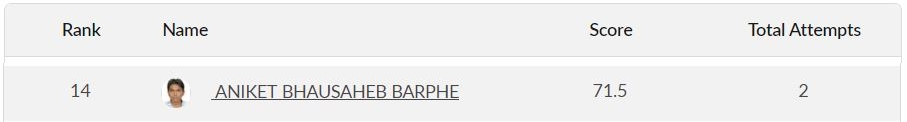

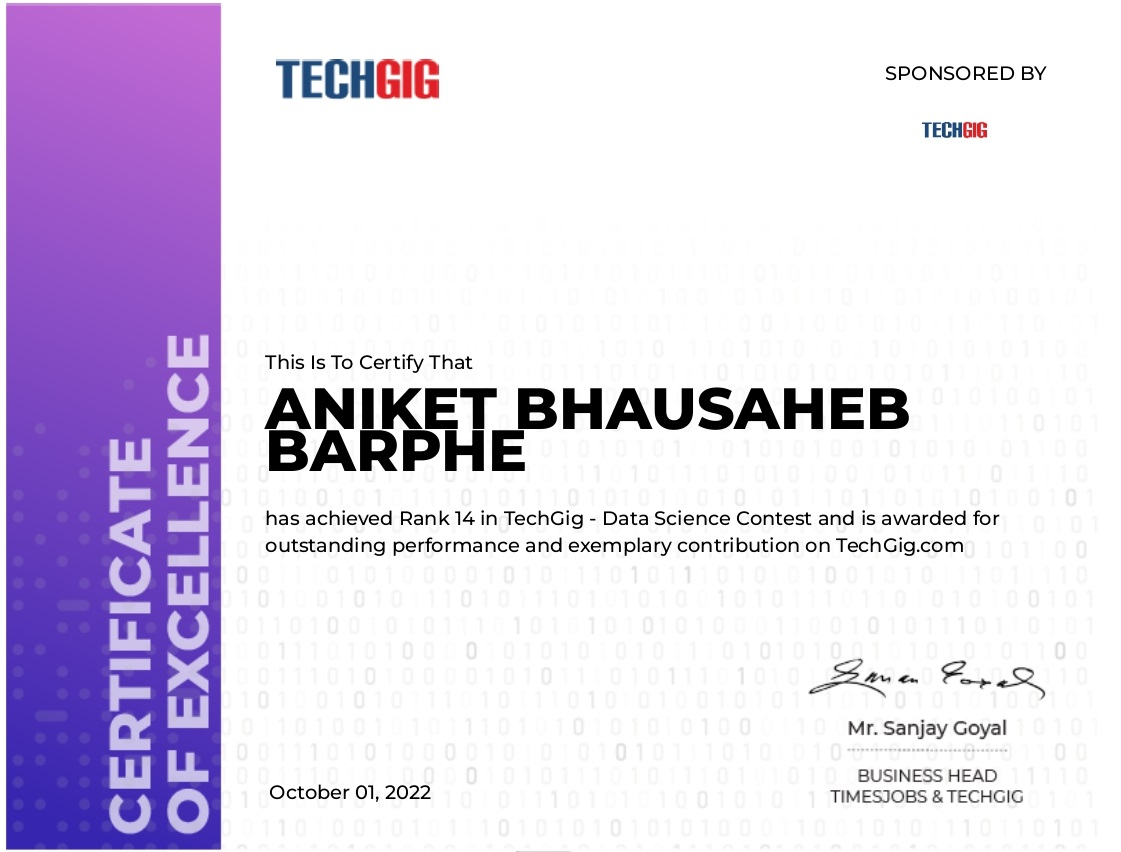

Competition Link:  https://www.techgig.com/challenge/DB/data-science

Rank Scored: 14 out of 292 participants.